Useful links:

https://www.datacamp.com/community/blog/jupyter-notebook-r

https://gist.github.com/simecek/019d87c55fec3839d95bbf8489dde61d

http://rpy.sourceforge.net/rpy2/doc-2.1/html/introduction.html#getting-started

https://ragrawal.wordpress.com/2016/08/03/using-r-ggplot-within-ipython-notebook/

http://simecek.xyz/blog/2017/04/03/r-magic-in-jupyter-notebooks/



In [2]:
import rpy2
import warnings
warnings.filterwarnings('ignore')

In [1]:
#rpy2.__path__

In [3]:
%load_ext rpy2.ipython

In [4]:
%load_ext rmagic

Run entire cell in R code, use "cell magic" function %%R after loading extensions rpy2.ipython and rmagic

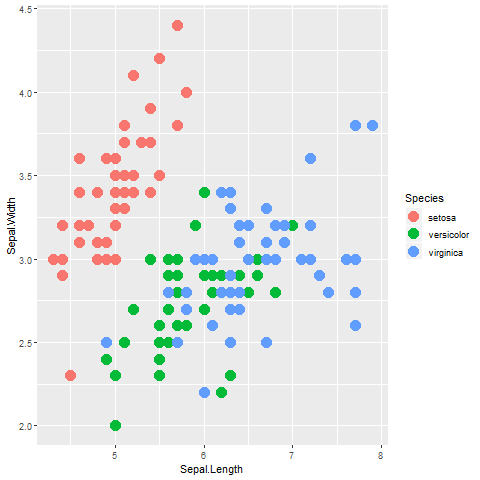

In [5]:
%%R
library(dplyr)
iris
iris %>%
 group_by(Species) %>%
 summarise(Sepal.Width.Avg = mean(Sepal.Width)) %>%
 arrange(Sepal.Width.Avg)
library(ggplot2)
ggplot(data=iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point(size=5)

Run Python and R in the same cell: Use "line magic" function %R after loading extensions

In [6]:
#%R library(dplyr)
#%R library(ggplot2)

import pandas as pd 
# Make a pandas DataFrame
df = pd.DataFrame({#'Alphabet': ['a', 'b', 'c', 'd','e', 'f', 'g', 'h','i'],
                   'A': [4, 3, 5, 2, 1, 7, 7, 5, 9],
                   'B': [1, 4, 3, 6, 7, 10,11, 9, 13],
                   'C': [1, 2, 3, 1, 2, 3, 1, 2, 3]})

%R -i df

%R df1 <- df[1]-2

%R print(df)

#%R print(df1)

,A,B,C
0,4,1,1
1,3,4,2
2,5,3,3
3,2,6,1
4,1,7,2
5,7,10,3
6,7,11,1
7,5,9,2
8,9,13,3


In [7]:
%R print(df1)

,A
0,2.0
1,1.0
2,3.0
3,0.0
4,-1.0
5,5.0
6,5.0
7,3.0
8,7.0


Plot python data frame with GGPLOT in new cell

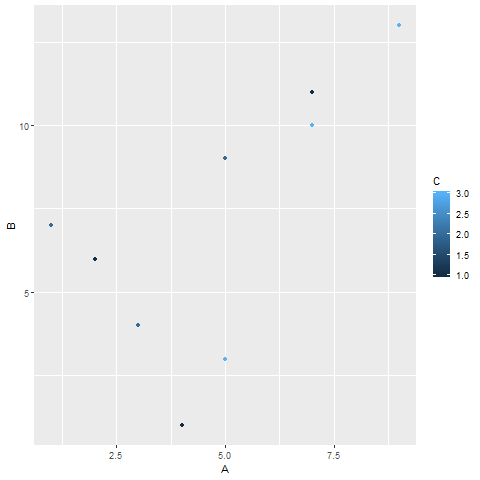

In [8]:
%%R
library(ggplot2)
ggplot(data=df) + geom_point(aes(x=A, y=B, color=C))

New Example in the following cells. From: http://simecek.xyz/blog/2017/04/03/r-magic-in-jupyter-notebooks/

In [9]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
%R require(ggplot2); require(tidyr)

array([1], dtype=int32)

In [12]:
import numpy as np
import pandas as pd 
np.random.seed(42)
# Make a pandas DataFrame
df = pd.DataFrame(np.random.normal(0,1,size=(100, 3)), columns=list('ABC'))
df['C'] = df['C'] + 2

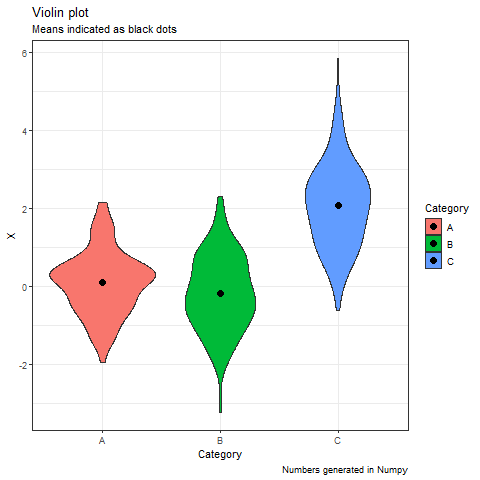

In [13]:
%%R -i df
df %>% 
  gather("Category", "X") %>%
  ggplot(aes(x = Category, y = X, fill = Category)) +
    geom_violin() +
    stat_summary(fun.y=mean, color='black', geom='point', size = 3) +
    labs(title = "Violin plot",
         subtitle = "Means indicated as black dots",
         captions = "Numbers generated in Numpy") +
    theme_bw()